<h1>Assignment 1 : Analyse en composantes principales</h1>

Auteur : Nicolas Papadakis, 2022


# 1. Introduction 

## Objectif

Nous allons utiliser l'Analyse en Composantes Principales (ACP)  sur un jeu de données, 
afin de mettre en évidence le principe, l'intérêt (réduction de dimension) et les limitations (interprétation de la visualisation) de cette méthode.

## Le jeu de données d'empreinte écologique

Ce jeu de données, produit par l'organisme à but non lucratif "Global Footprint Network" fournit depuis 2003 des informations sur l'empreinte écologique des pays, et calcule notamment chaque année le [Jour de dépassement](https://fr.wikipedia.org/wiki/Global_Footprint_Network#Le_Jour_de_d%C3%A9passement), où l'humanité a épuisé les ressources naturelles de la Terre pour l'année en cours.
Les données renseignent sur l'empreinte écologique  de la production, de la consommation et de la biocapacité (capacité à fournir des ressources renouvellables) de chaque pays par rapport aux composantes suivantes :
- les terres cultivées 
- les pâturages 
- les forêts 
- les zones de pêche 
- les terrains bâtis
- les émissions carbones.

Toutes ces composantes sont exprimées dans une même unité, l'[hectare global](https://fr.wikipedia.org/wiki/Biocapacit%C3%A9#Hectare_global), censée mesurer l'empreinte écologique.
Comme c'est toujours le cas, ces informations sont sujettes à des incertitudes liées à la collecte des données et aux hypothèses (par ex. qu'est ce qui est comptabilisé et ne l'est pas) faites par les auteurs et non présentées ici.

Nous nous intéressons dans ce TP uniquement aux données de consommation par pays sur l'année 2018. Les valeurs correspondantes de production (non fournies ici) sont inférieures, ce qui explique que chaque année, on consomme plus que ce que la Terre est capable de produire en une année.
Nous utiliserons également des données complémentaires fournies dans la base : le PIB par habitant ainsi que  l'[indice de développement humain](https://fr.wikipedia.org/wiki/Indice_de_d%C3%A9veloppement_humain).

### Lire le fichier de données
Pour lire les données, on peut utiliser le module `panda` qui permet de gérer des tableaux de données.

In [1]:
import pandas as pd
data = pd.read_csv("ecological_footprint_consommation.csv",encoding = 'ISO-8859-1', index_col=0)
data.head()

,Region,PIB/habitant (en millier de dollars),Indice de developpement humain,Terres cultivees,Paturages,Forets,Zones de peches,Terrains batis,Carbone
Pays,,,,,,,,,
Afghanistan,Middle East/Central Asia,0.56,0.509,0.3,0.2,0.1,0.0,0.0,0.2
Albania,Other Europe,5.05,0.792,0.5,0.2,0.2,0.0,0.0,0.9
Algeria,Africa,4.76,0.746,0.6,0.2,0.2,0.0,0.0,1.3
Angola,Africa,3.23,0.582,0.3,0.1,0.1,0.1,0.0,0.2
Argentina,South America,10.08,0.842,0.9,0.7,0.3,0.1,0.1,1.2


 Dans ce qui suit, on récupère le tableau des données qualitatives dans la matrice $X$ et la variable qualitative dans un vecteur "region". Quelques exemples d'affichage du contenu des données sont également fournis.

In [2]:
#Import des autres modules utiles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n=data.shape[0]
print('Nombre d\'individus (pays) :', n)

## La première variable contient la région du globe.
## Récupérer la donnée qualitative (la région du globe)
region=data.loc[:,data.columns[0]].to_list()


## Récupérer le tableau des données quantitatives

#considérer les données de la colonne start_col à la dernière colonne
start_col=1 #doit être entre 1  (la colonne 0 est celle de la région) et data.shape[1]

p=data.shape[1]-start_col
print('La dimension des données est : ', p)

X=data.loc[:, data.columns[start_col]:data.columns[start_col+p-1]].to_numpy().reshape([n,p])
print('Taille du tableau des données :', X.shape,'\n')

#Exemples
print('L\'individu \"', data.index[4],'\" a pour valeur de région :',region[4],'\n')
print('L\'individu \"', data.index[4],'\" a pour variables :\n', X[4,:],'\n')

print('Les valeurs de la variable \"',  data.columns[3] , '\" pour l\'ensemble des individus sont:\n', X[:,2])
#décalage d'index ci dessus, car la première colonne a été mise dans région


Nombre d'individus (pays) : 149
La dimension des données est :  8
Taille du tableau des données : (149, 8) 

L'individu " Argentina " a pour valeur de région : South America 

L'individu " Argentina " a pour variables :
 [10.08   0.842  0.9    0.7    0.3    0.1    0.1    1.2  ] 

Les valeurs de la variable " Terres cultivees " pour l'ensemble des individus sont:
 [0.3 0.5 0.6 0.3 0.9 0.5 0.8 0.6 0.6 0.6 0.4 0.6 0.7 1.1 0.5 0.8 0.5 0.5
 0.9 0.3 0.6 0.5 0.7 0.5 0.4 0.6 0.9 0.3 0.4 0.6 0.6 0.4 0.3 0.2 0.4 0.6
 0.6 0.7 0.7 0.4 0.4 0.2 0.3 0.4 0.4 0.7 0.5 0.5 0.4 0.7 0.6 0.7 0.4 0.6
 0.6 0.9 0.3 0.7 0.3 0.5 0.6 0.4 0.9 0.7 0.8 0.4 0.4 0.4 0.9 0.3 0.7 0.7
 0.4 0.7 0.8 0.6 0.3 0.3 0.7 0.8 0.8 0.2 0.5 0.7 0.7 0.5 0.5 0.3 0.6 0.7
 0.3 0.8 0.3 0.5 1.  0.3 0.8 0.5 0.8 0.5 0.3 0.4 0.3 0.7 0.5 0.4 0.6 0.8
 0.5 0.7 1.  0.6 0.3 0.5 0.6 0.6 0.8 0.5 0.6 0.6 0.6 0.4 0.3 1.1 0.4 0.5
 0.3 0.7 0.6 0.4 0.4 0.4 0.3 0.4 0.4 0.6 0.8 0.4 0.2 0.6 0.9 0.7 0.9 0.1
 0.4 0.5 0.2 0.2 0.2]


## Objectif  
Dans ce qui suit, nous allons utiliser l'ACP pour essayer de déterminer des similarités ou des différences entre les empreintes écologiques des différents pays.

## L'ACP
L'ACP consiste à projeter des données dans un espace décorrélé, pour 2 objectifs:
- Réduire la dimension des données, en résumant de manière optimale l'information à partir des composantes les plus significatives
- Visualiser des données de grande dimension (ici $p=8$) sur un plan $2D$ afin, potentiellement, de mieux les comprendre

# 2. ACP non normalisée : 

Soit $X=\{x_i^j\}$ le tableau des données contenant $i=1\cdots n$ individus et $j=1\cdots p$ variables

L'ACP non normalisée consiste à :
- Centrer les données : $\bar x_i^j= x_i^j-\mu^j$, où $\mu^j=\frac1n\sum_{i=1}^nx_i^j$
- Calculer $\Sigma$, la matrice de covariance des données :
 $$\Sigma =\frac1n \bar X^T\bar X=\begin{pmatrix}\sigma_1^2 & \text{Cov}(\bar x^1,\bar x^2)&\cdots&\text{Cov}(\bar x^1,\bar x^p)\\
				 \text{Cov}(\bar x^1,\bar x^2)&\ddots & & \vdots\\
				 \vdots & &\ddots &\vdots\\
				 \text{Cov}(\bar x^1,\bar x^p)&\cdots&\cdots &\sigma_p^2
\end{pmatrix}$$
où $\text{Cov}(\bar x^j,\bar x^{j'})=\frac1n\sum_{i=1}^n\bar x^j_i \bar x_i^{j'}$ et $\sigma_j^2=\text{Cov}(\bar x^j,\bar x^{j})$
- Réaliser la décomposition de $\Sigma$ en vecteur propre / valeurs propres : $\Sigma=V^T \Lambda V$, où $V$ est la matrice contenant les vecteurs propres et $\Lambda$ est une matrice diagonale contenant les $p$ valeurs propres $\{\lambda_j\}$. 
- Calculer les coordonnées projetées est: $\bar S=\bar XV$, où $s_i^j$ est la coordonée projetée de l'individu $i$ sur la composante principale $j$

L'inertie relative d'une composante principale $j$ est $I_j=\frac{\lambda_j}{\sum_{k=1}^p\lambda_k}$.
L'inertie peut être utilisée pour réduire la dimension des données, en ne conservant que les composantes significatives (ayant une proportion d'inertie importante).

## <span style="color:red"> Questions  (9 points)</span>
Réaliser une ACP non normalisée:
- Centrer les données pour obtenir $\bar X$ (1pt)
- Calculer $\Sigma$, la matrice de variance-covariance des données centrées $\bar X$ (1pt)
- Calculer les vecteurs propres et valeurs propres de cette matrice, en utilisant la fonction `np.linalg.eig` (1pts)
***Attention :*** *Les valeurs et vecteurs propres propres fournis par `np.linalg.eig` ne sont pas nécessairement ordonnées, et il faut veiller à bien projeter sur les vecteurs propres correspondants aux 2 valeurs propres les plus grandes.*
- Calculer la proportion d'inertie relative de l'ensemble des composantes principales (1pt)
- Calculer les coordonnées projetées des individus sur les composantes principales (1pts)
- Tracer sur un plan 2D (par exemple avec `plt.scatter`) le nuage des individus sur les 2 axes principaux, en utilisant la même échelle pour l'affichage des $2$ axes (par exemple avec `plt.axis('equal')`) . Afficher à côté de quelques points le nom du pays correspondant (par exemple avec `plt.annotate`). Les coordonnées de chaque pays sont celles correspondantes aux 2 premières composantes principales, celles qui ont la plus forte proportion d'inertie. (2pts)
- Qu'observez-vous ? Pourquoi ? (2pts)

la plus grandes valeur propre : 386.31225794138044        la deuxieme plus grande valeur propre : 1.2862094481301938
on peut meme réduire à une dimension car on a réussi à avoir une inertie > 95%


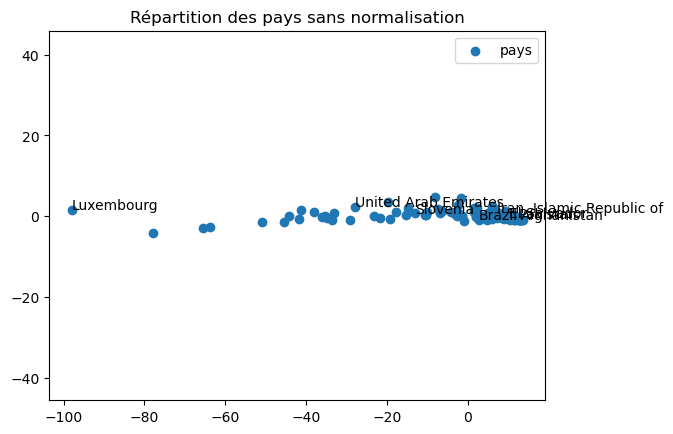

In [3]:
##ACP non normalisée :

##Centrer les données (1pt)
X_=X-((1/n)*np.sum(X,axis=0))


#Matrice de variance-covaraiance (1pt)
S=(1/n)*np.dot(X_.T,X_)



##Vecteurs propres et valeurs propres (1pt)
V=np.eye(n)
D=np.eye(n)
D,V=np.linalg.eig(S)
#D est une collone
##############################""#je multiplie par I8 pour la transformer en une matrice (8,8) ???????????????????

#print(D)
a=np.argsort(D)      # donne les indices qui peuvents ordonner D.
#print(a)
print('la plus grandes valeur propre :',D[a[-1]],'       la deuxieme plus grande valeur propre :',D[a[-2]]) # les indices des deux plus grandes valeurs


##Inertie (1pt)
I=np.sum(D)
#print('I1 =',D[a[-1]]/I,'    I2 =',(D[a[-1]]+D[a[-2]])/I)
print("on peut meme réduire à une dimension car on a réussi à avoir une inertie > 95%")


##Cordonnées projetées (1pt)
#print(data.index[a[-2]])
S_=np.dot(X_,V)
x,y=S_[:,a[-1]],S_[:,a[-2]]


##Nuage des individus (2pts)
plt.scatter(x, y)
for i in range(len(x)):
    if(i%20==0):
        plt.annotate(str(data.index[i]), (x[i], y[i]))
plt.axis('equal')
plt.title('Répartition des pays sans normalisation')
plt.legend(['pays'])
plt.show()

On remarque qu'on peut se limiter à une seule dimension car I1>90%. De plus les pays sont trop serrés suivant l'axe Y ce qui peut provenir de la non-normalisation des données et ce qui justifie davantage qu'on puisse se limiter à une seule dimension. On peut remarquer que notre graphe est correct car les pays Africains se trouvent à l'extrémité droite du graphe.(2pts)

# 3. ACP normalisée

Soit $X=\{x_i^j\}$ le tableau des données contenant $i=1\cdots n$ individus et $j=1\cdots p$ variables

L'ACP normalisée consite à :
- Standardiser les données : $\tilde x_i^j= (x_i^j-\mu^j)/\sigma^j$, où $\mu^j=\frac1n\sum_{i=1}^nx_i^j$ et $\sigma^j=\sqrt{\frac1n\sum_{i=1}^n(x_i^j-\mu^j)^2}$
- Calculer $C$, la matrice de corrélation des données :
 $$C =\frac1n \tilde X^T\tilde X=\begin{pmatrix}1 & \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^2)}{\sigma_1\sigma_2}&\cdots& \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^p)}{\sigma_1\sigma_p}\\
				  \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^2)}{\sigma_1\sigma_2}&\ddots & & \vdots\\
				 \vdots & &\ddots &\vdots\\
				  \frac{\text{Cov}(\tilde{x}^1,\tilde{x}^p)}{\sigma_1\sigma_p}&\cdots&\cdots &1
\end{pmatrix}$$
où  $\text{Cov}(\tilde x^j,\tilde x^{j'})=\frac1n\sum_{i=1}^n\tilde x^j_i \tilde x_i^{j'}$ et $\sigma_j^2=\text{Cov}(\tilde x^j,\tilde x^{j})$
- Réaliser la décomposition de $C$ en vecteur propre / valeurs propres : $C=V^T \Lambda V$, où $V$ est la matrice contenant les vecteurs propres et $\Lambda$ est une matrice diagonale contenant les $p$ valeurs propres $\{\lambda_j\}$. 
- Calculer les coordonnées projetées : $S=\tilde XV$, où $s_i^j$ est la coordonée projetée de l'individu $i$ sur la composante principale $j$

L'inertie relative d'une composante principale $j$ est 
$$I_j=\frac{\lambda_j}{\sum_{k=1}^p\lambda_k}$$

## <span style="color:red"> Questions  (4 points)</span>
**Réaliser une ACP normalisée :**
- Standardiser les données pour obtenir $\tilde X$ (1pt)
- Calculer la matrice $C$ de covariance des données standardisées $\tilde X$ (=matrice de corrélation des données $X$, les vecteurs propres et valeurs propres de cette matrice, puis les coordonnées projetées (0pt, c'est comme avant)

**Etude des résultats :**
- Calculer la proportion d'inertie de l'ensemble des composantes principales (0pt). Combien de composantes faut-il garder pour conserver $90\%$ de la variabilité des données ? (.5pt) Combien de proportion de l'inertie conservera-t-on lors d'un affichage en 2D ? (.5pt)
- Visualisation des coordonnées projetées. Utiliser le bout de code fourni qui trace sur un plan 2D le nuage des individus, avec une couleur de point qui dépend de la région du globe à laquelle appartient le pays. Comme avant, les coordonnées de chaque pays sont celles correspondantes aux 2 premières composantes principales, les 2 de plus forte inertie relative. Qu'observez-vous ? (Faire une analyse relative aux régions, vous pouvez afficher le nom des pays si cela vous aide dans votre analyse) (2pts)



In [4]:
# ACP normalisée :

#Standardiser les données (1pt)
X_=(X-((1/n)*np.sum(X,axis=0)))/np.sqrt((1/n)*np.sum((X-((1/n)*np.sum(X,axis=0)))**2,axis=0))
mu=(1/n)*np.sum(X,axis=0)
sigma=np.sqrt((1/n)*np.sum((X-((1/n)*np.sum(X,axis=0)))**2,axis=0))
#Faire l'ACP
C=(1/n)*np.dot(X_.T,X_)
#print(C)
#print(S)
V=np.eye(n)
D=np.eye(n)
D,V=np.linalg.eig(C)
#print(V)
a=np.argsort(D)
#print(a)
a=np.flip(a)
#print(a)
I=np.array((len(D),))
I=(D/np.sum(D))
I=np.flip(np.sort(I))
I1=np.cumsum(I)
"""
I=np.sum(D)
I1=np.empty((len(D),),dtype=float)
for j in a:
    np.append(I1,[[(D[j])/I]])
    print("  ajout de : ",D[j]/I)
print(I1)
"""
#print(I)
#print(I1)
location=np.where(I1>=0.9)
S=np.dot(X_,V)
#print(S)
#print(V.shape)
"""
x,y=S[:,a[-1]],S[:,a[-2]]
plt.scatter(x, y)
for i in range(len(x)):
    if(i%20==0):
        plt.annotate(str(data.index[i]), (x[i], y[i]))
plt.axis('equal')
plt.xlabel('PIB')
plt.ylabel('IDH')
plt.title('Répartition des pays sans normalisation')
plt.legend(['Sine'])
plt.show()
"""
#Inertie
print("On dépasse le 90% la premiere fois en",location[0][0]+1,"On a donc besoin de",location[0][0]+1,"composante(s)")
print('On garde',I1[1]*100,"% en se limitant à la representation 2D")

On dépasse le 90% la premiere fois en 6 On a donc besoin de 6 composante(s)
On garde 53.35078061532301 % en se limitant à la representation 2D


On dépasse le 90% la première fois en 6 On a donc besoin de 6 composantes
On garde 53.35078061532301 % en se limitant à la représentation 2D : Question sur l'intertie (1pt)

Les régions possibles sont :
 ['Middle East/Central Asia', 'Other Europe', 'Africa', 'South America', 'EU', 'Central America/Caribbean', 'Asia-Pacific', 'North America'] 



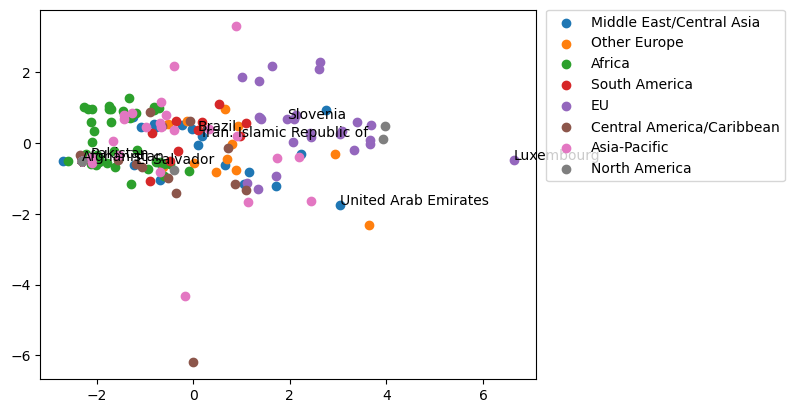

In [5]:
#Code d'affichage fourni
#necessite la matrice S des corddonées projetée, de taille (n x p)

#Récupérer la liste des régions différentes
labels_region=pd.unique(data['Region']).tolist()
print('Les régions possibles sont :\n',labels_region,'\n')


#Transformer la variable region en index pointant vers les labels
index_region=np.array(np.ones([n, 1]),dtype=int)
for i in range(n):
    index_region[i]=labels_region.index(region[i])

    
fig, ax = plt.subplots()

for i in range(len(labels_region)) :
    idx=np.where(index_region==i) 
    ax.scatter(S[idx,a[0]],S[idx,a[1]])

##Afficher le nom des pays, attention on verra plus rien 
for i in range(0,n,20):
    ax.annotate(data.index[i], (S[i,a[0]], S[i,a[1]]))    
    ax.legend(labels_region, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

On remarque que les pays sont bien plus espacés que sans normalisation de données et que les pays de même région sont plus proches sauf quelques pays comme "Other Europe" et on peut penser que c'est une erreur car on ne garde que 53% des informations initiales. De plus les pays du même continent sont plus au moins proches. : vos conclusions (2pts)

## Etude des individus
Avant d'aller plus loindans l'analyse des variables, nous allons tout d'abord étudier les individus.
Nous allons notamment regarder si certains pays ont eu un impact important sur le calcul des composantes principales tout en ayant une mauvaise qualité de représentation.
- La qualité de représentation d'un pays $x_i$ par la composante $s^k$ est :
$$Q(i,k)=\frac{(s_i^k)^2}{\sum_{l=1}^p(s_i^l)^2}$$

- La contribution d'un individu $x_i$ au calcul de la composante $s^j$ est donné par :
$$ctr(i,k)=\frac{(s_i^k)^2}{\sum_{m=1}^n(s^k_m)^2}$$

Nous allons également examiner si le modèle a de bonnes capacités de généralisation, c'est à dire si il peut bien représenter des individus qui n'ont pas été utilisés lors du calcul de l'ACP. Nous considérons pour cela les données des $4$ pays suivants, dont les valeurs de variables (PIB, ..., carbone) sont : 

- Australie=[49.71, 0.921, 0.8, 0.3, 0.9, 0.1,0.1, 3.9]
- Ethiopie=[0.57, 0.478, 0.3, 0.1, 0.4, 0.0, 0.1, 0.1]
- France=[45.06, 0.898, 0.8, 0.2, 0.5, 0.2, 0.2, 2.5]
- Qatar=[63.99, 0.845, 0.7, 0.3, 0.2, 0.2, 0.0, 12.8]  

## <span style="color:red"> Questions  (8 points)</span>
**Etude des individus :**
- Calculer la contribution de chaque pays pour chacun des axes principaux (1pt)
- Afficher la liste des pays qui ont une contribution supérieure à 5% pour une ou l'autre des composantes principales. Afficher pour ces pays la valeur des contributions ainsi que la qualité de leur représentation (1pt)
- Que concluez-vous ? (1pt)

**Individus supplémentaires :**
- Calculer les coordonnées projetées $s_l$ des nouveaux pays fournis (Australie, Ethipie, Danemark et Qatar)  : $s_l=\tilde z_lV$, avec $z_l$ les variables originales du pays $l$, et $\tilde z_l^j=(z_l^j-\mu^j)/\sigma^j$, les variables standardisées avec les moyennes et variances précédentes de l'ACP et $V$ les vecteures propres de l'ACP (1pt)
- Calculer la qualité de la représentation de ces 4 pays sur les 2 composantes principales (1pt)
- Ajoutez ces pays sur le diagramme 2D de la question précédente (celui où la couleur d'un point correspond à sa région). Indiquer le nom de ces 4 pays à côté de leur points (1pt)
- Etudier la position de ces nouveaux pays par rapport à celles des autres pays de leurs régions. Que concluez-vous ? (2pts)

In [6]:
# Contributions (1pt)
ctr=np.array((S.shape))
ctr=((S**2)/(np.sum(S**2,axis=0)))

# Affichage (1pt)
sum=np.reshape(np.sum(S**2,axis=1),(1,149)).T
Q=(S**2)/sum
pays_cont=[]
for i in range(n):
    if ctr[i,a[0]] >0.05 or ctr[i,a[1]]>0.05:
        pays_cont+=[i]
        print(data.index[i])
        print("contribution",ctr[i,[a[0],a[1]]])
        print("Qualité",Q[i,[a[0],a[1]]])
#print(pays_cont)

# L'Australie parait proche d'un pays Européen, 
# mais la qualité de représentation de l'Australie est trop faible pour être significative.
# Le Danemark et l'éthopie sont représentatifs de leurs régions respectives (Europe et Afrique).
# Le Qatar semble une donnée un peu atypique : il est assez bien représenté,
# mais très différents des autres pays (notamment ceux de sa région) une fois projeté

Belize
contribution [5.31404068e-09 2.24184413e-01]
Qualité [1.99017869e-08 3.09625843e-01]
Bhutan
contribution [0.00168584 0.06313244]
Qualité [0.03049449 0.42113604]
Luxembourg
contribution [0.09479909 0.00136589]
Qualité [0.786507   0.00417905]
Mongolia
contribution [6.14410183e-05 1.08405922e-01]
Qualité [0.00026899 0.17502318]


On remarque que ces pays ont les contributions les plus grandes ce qui affecte de façon importante le reste des données, sauf que leur qualité est très petite ce qui est très mauvais pour la représentation car ils affectent les données des autres pays de façon négative. : vos conclusions (1pt)

[[ 3.03918011  0.2254702   0.37636025  0.01237731  0.25152681 -0.05758169
   0.16298917  0.08462969]
 [-2.00818333 -0.1389625   0.57234579  0.55411224  0.98740558 -0.11355282
  -0.36266439 -0.12663765]
 [ 2.5310299   0.78232089  0.31241755  0.49770302  1.33676705  1.39308305
  -0.31723184 -0.22434723]
 [ 4.89237675 -3.70991914  0.87242993  1.88589349 -2.36931696 -0.25504923
   2.06968103  0.39155976]]


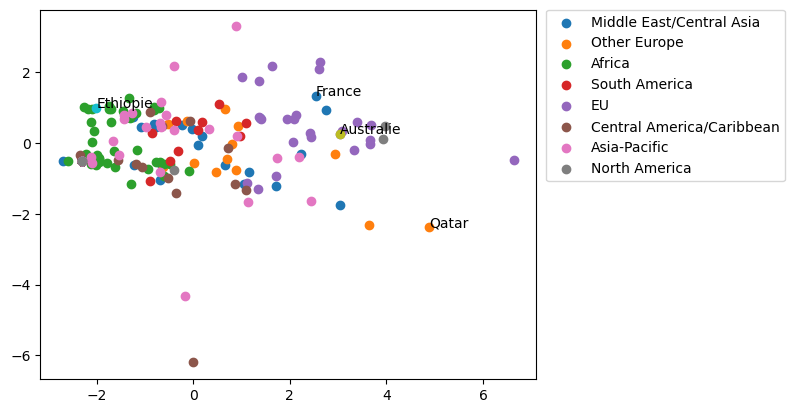

In [7]:
#Nouveaux individus
Australie=[49.71, 0.921, 0.8, 0.3, 0.9, 0.1,0.1, 3.9]
Ethiopie=[0.57, 0.478, 0.3, 0.1, 0.4, 0.0, 0.1, 0.1]
France=[45.06, 0.898, 0.8, 0.2, 0.5, 0.2, 0.2, 2.5]
Qatar=[63.99, 0.845, 0.7, 0.3, 0.2, 0.2, 0.0, 12.8]          

Z=np.array((Australie,Ethiopie,France,Qatar))
Z_=(Z-mu)/sigma

#Coordonnées projetées des nouveaux individus (1pt)
Sl=np.dot(Z_,V)
print(Sl)
#Qualité de représentation de ces individus (1pt)
Q=((Sl**2)/(np.sum(Sl**2,axis=1)[0]))
#print(Q.shape)

#Affichage de ces individus (1pt)
labels_region=pd.unique(data['Region']).tolist()
#print('Les régions possibles sont :\n',labels_region,'\n')

#Transformer la variable region en index pointant vers les labels
index_region=np.array(np.ones([n, 1]),dtype=int)
for i in range(n):
    index_region[i]=labels_region.index(region[i])

    
fig, ax = plt.subplots()
for i in range(len(labels_region)) :
    idx=np.where(index_region==i) 
    ax.scatter(S[idx,a[0]],S[idx,a[1]])
    
for i in range(0,n,20):
    #ax.annotate(data.index[i], (S[i,0], S[i,1]))    
    ax.legend(labels_region, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#ax.scatter(Sl[:][0],Sl[:][1])
countries=np.array(("Australie","Ethiopie","France","Qatar"))
for idx in range(len(Sl)) :
    ax.annotate(countries[idx],(Sl[idx,a[0]],Sl[idx,a[1]]))
    ax.scatter(Sl[idx,a[0]],Sl[idx,a[1]])


On observe que l'Australie se trouve au milieu des pays Européen ce qui faux et qui prévient de sa faible qualité de représentation. Le Qatar est un peu loin des pays de Middle East ce qui tolerable par rapport à sa distance aux autres continents. Par contre on observe que l'Éthiopie se trouve bien au milieu des pays Africain , de même pour la France qui se trouve au milieu des pays Européen ce qui est bien vrai (grande qualité de représentation).
: vos conclusions (2pts) 

# Etude des variables

Nous allons à présent étudier la contribution et la qualité de représentations des variables (PIB,...)  relativement aux 2 composantes principales. On note $cor(x,s)=\frac1n \sum_{i=1}^nx_is_i/\sigma$ la corrélation entre $2$ variables $x$ et $s$ centrées de dimension $n$, avec $\sigma=\sqrt{\frac1n\sum_{i=1}^ns_i^2}$. 
- La qualité de représentation d'une variable standardisée $\tilde x^j$ par la composante $s^k$ est :
$$Q(j,k)=\frac{cor(\tilde x^j,s^k)^2}{\sum_{l=1}^p cor(\tilde x^j,s^l)^2}$$

- La contribution d'une variable $x^j$  à l'inertie de la composante $s^k$ est donné par :
$$ctr(j,k)=\frac{cor(\tilde x^j,s^k)^2}{\sum_{l=1}^p cor(\tilde x^l,s^k)^2}$$



## <span style="color:red"> Questions  (5 points)</span>
- Calculer la qualité de représentation de chaque variable par les deux premières composantes principales (1pt)
- Réprésenter les variables sur le cercle des corrélations (par exemple en utilisant `plt.quiver`) (1pt)
- Calculer et afficher la contribution de chaque variable aux 2 premières composantes principales (1pt)
- Que pouvez-vous en déduire (variables corrélées...) ? (2pts)

qualité
[[0.74581608 0.02049143]
 [0.76178147 0.0197324 ]
 [0.51296988 0.01465897]
 [0.01487955 0.1258813 ]
 [0.23023624 0.13074732]
 [0.00972971 0.2694624 ]
 [0.09074814 0.54236012]
 [0.75199508 0.02657235]]

contribution
[[0.23918497 0.01782009]
 [0.24430511 0.01716001]
 [0.16451065 0.01274797]
 [0.00477191 0.10947092]
 [0.0738373  0.11370258]
 [0.00312034 0.23433422]
 [0.02910314 0.47165593]
 [0.24116659 0.02310828]]


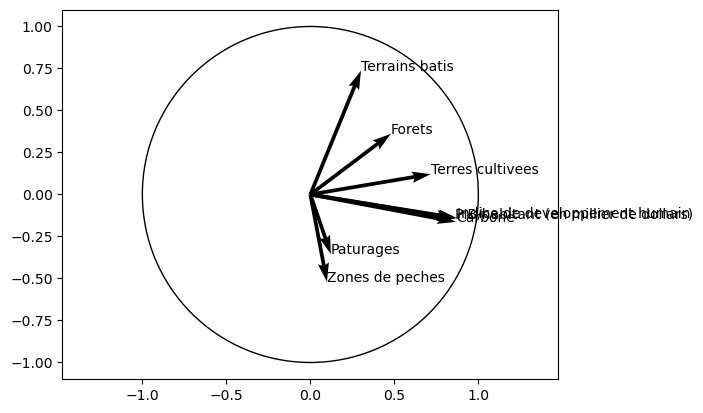

In [8]:
#Qualité de représentation des variables (1pt)
sigma=np.sqrt(np.sum(S**2,axis=0)/n)
cor=np.dot(X_.T,S)
cor=cor/sigma/n
Q=cor**2/np.sum(cor**2,axis=1)
#print(cor)
print("qualité")
print(Q[:,[a[0],a[1]]])
#Affichage sur le cercle des corrélations (1pt)

circle=plt.Circle((0,0),1,fill=0)

fig, ax = plt.subplots()
ax.quiver(np.zeros(len(cor)),np.zeros(len(cor[0])),cor[:,a[0]],cor[:,a[1]],angles='xy', scale_units='xy', scale=1)
ax.add_patch(circle)
plt.axis((-2, 2, -2, 2))
for i in range(1,len(data.columns)):
    ax.annotate(data.columns[i],(cor[i-1,a[0]],cor[i-1,a[1]]))
plt.axis('equal')
#Contribution des variables (1pt)
ctr=cor**2/np.sum(cor**2,axis=0)
print()
print("contribution")
print(ctr[:,[a[0],a[1]]])

Les vecteurs ne sont pas tous proches du cercle, donc il y a 4 dimensions dont la qualité est basse.
Et on peut effectivement voir ceci en regardant les composantes principales de la qualité (mauvaise qualité < 0.5). De plus il y a des variables corrélées comme "PIB/Habitant","Terrains bâtis" et "Carbone" ce qui inutile car une seule de ces variables est suffisante pour représenter le changement des autres variables. : vos conclusions (2pts) 

## <span style="color:red"> Questions bonus  (+4 points)</span>

- A partir de ces résultats, argumentez sur la sélection d'un sous ensemble des variables de X qui vous semblerait pertinent (2 pt)
- Réaliser depuis le début l'ACP normalisée sur ce sous ensemble de variables (0pt, normalement tout est déjà codé)
- Visualiser / Analyser les résultats (2pts)


On peut prendre l'ensemble des variables décorrélées et ne garder qu'une seule des corrélée. On peut aussi enlever les pays dont la contribution est très élevée et qui déforme de façon très forte notre graph. (2pts)

Les régions possibles sont :
 ['Middle East/Central Asia', 'Other Europe', 'Africa', 'South America', 'EU', 'Central America/Caribbean', 'Asia-Pacific', 'North America'] 



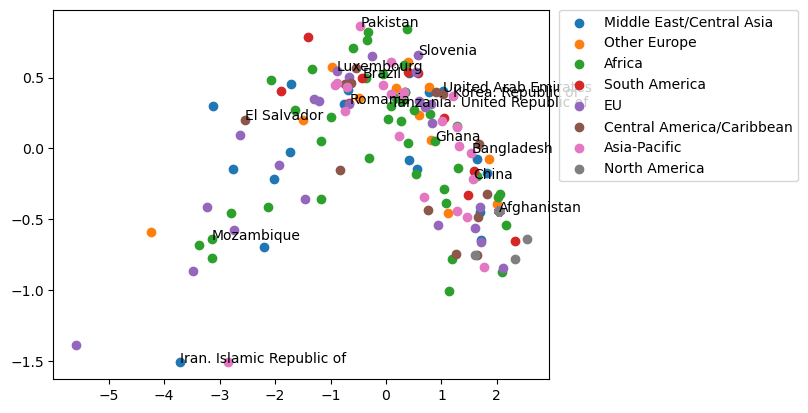

In [9]:
X=X[:,:6]
X=np.delete(X,pays_cont,0)
n=X.shape[0]
X_=(X-((1/n)*np.sum(X,axis=0)))/np.sqrt((1/n)*np.sum((X-((1/n)*np.sum(X,axis=0)))**2,axis=0))
mu=(1/n)*np.sum(X,axis=0)
sigma=np.sqrt((1/n)*np.sum((X-((1/n)*np.sum(X,axis=0)))**2,axis=0))
C=(1/n)*np.dot(X_.T,X_)
D,V=np.linalg.eig(C)
a=np.argsort(D)
a=np.flip(a)
I=np.array((len(D),))
I=(D/np.sum(D))
I=np.flip(np.sort(I))
I1=np.cumsum(I)
location=np.where(I1>=0.9)
S=np.dot(X_,V)

labels_region=pd.unique(data['Region']).tolist()
print('Les régions possibles sont :\n',labels_region,'\n')


#Transformer la variable region en index pointant vers les labels
index_region=np.array(np.ones([n, 1]),dtype=int)
for i in range(n):
    index_region[i]=labels_region.index(region[i])

    
fig, ax = plt.subplots()
for i in range(len(labels_region)) :
    idx=np.where(index_region==i) 
    ax.scatter(S[idx,0],S[idx,1])

##Afficher le nom des pays, attention on verra plus rien 
for i in range(0,n,10):
    ax.annotate(data.index[i], (S[i,0], S[i,1]))    
    ax.legend(labels_region, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Les pays sont bien plus dispersés qu'avant, et très bien repartis dans l'espace. Ceci sachant qu'on a enlevé les pays qui fausse notre représentation et les variables qui n'ajoutent pas plus d'informations que les variables précédentes. (2 pts)